# Classification

In [1]:
# libraries/ settings
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import plotly.express as px
import datetime

## Deciding on the model:

On the first run I will do basic classification with multiple models on both 1. standardized/normalized values and 2. PCA ones separately to check classification scores. 

In [2]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Normalized Xs

In [3]:
X = pd.read_pickle(os.path.join('data', 'X.pkl'))
y = X.kmeans_label.copy()
X.drop('kmeans_label', axis=1, inplace=True)

## Class Balances:  
Although the classes are not perfectly balanced, still the proportions are much better than a hugely imbalanced dataset and can be a reflection of a real world scenario, so I decided to keep them as it is. Further balancing or more data can greatly help the final classification model.

Proportion of each class:

0    0.363376
3    0.325031
1    0.175666
2    0.135928
Name: kmeans_label, dtype: float64


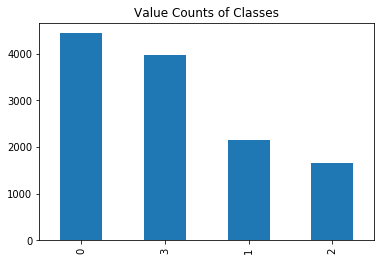

In [4]:
y.value_counts().plot(kind='bar', title='Value Counts of Classes');
print(f'Proportion of each class:\n\n{y.value_counts(normalize=True)}')


In [5]:
# stratify makes sure the proportions of classes are reserved during the random shuffling/sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)


KNeighborsClassifier
****Results****
Accuracy: 91.8587%
Log Loss: 0.5937678739948834
SVC
****Results****
Accuracy: 95.9037%
Log Loss: 0.08547418704970212
NuSVC
****Results****
Accuracy: 95.3405%
Log Loss: 0.08455003979541575
DecisionTreeClassifier
****Results****
Accuracy: 93.3948%
Log Loss: 2.2813631105701395
RandomForestClassifier
****Results****
Accuracy: 95.1869%
Log Loss: 0.19035910292909272
AdaBoostClassifier
****Results****
Accuracy: 85.4583%
Log Loss: 0.7428252231238343
GradientBoostingClassifier
****Results****
Accuracy: 96.9790%
Log Loss: 0.09501377610740355
GaussianNB
****Results****
Accuracy: 81.9252%
Log Loss: 3.1503282819084473
LinearDiscriminantAnalysis
****Results****
Accuracy: 94.9821%
Log Loss: 0.26201481285559036
⌚Process took: 0:02:17.949620


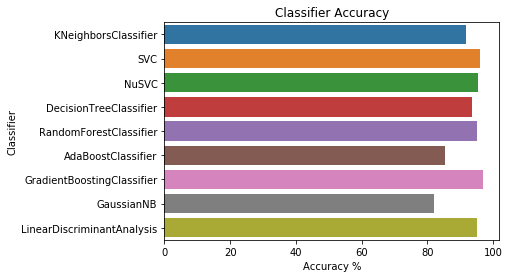

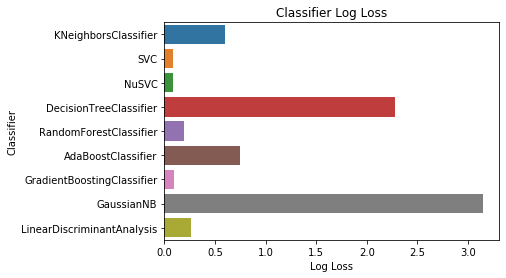

In [6]:
t1 = datetime.datetime.now() #⌚

# This is not my code found it a while back in a blog post, not sure who the credit goes to. did only minor adjustments.

classifiers = [
   KNeighborsClassifier(n_neighbors=5),
   SVC(kernel="rbf", C=1, probability=True, class_weight='balanced', random_state=42),
   NuSVC(nu=0.5, kernel='rbf', probability=True, class_weight='balanced', random_state=42), #Similar to SVC but uses a parameter to control the number of support vectors.
   DecisionTreeClassifier(class_weight='balanced', random_state=42),
   RandomForestClassifier(class_weight='balanced',random_state=42),
   AdaBoostClassifier(random_state=42),
   GradientBoostingClassifier(n_estimators=100, random_state=42),
   GaussianNB(),
   LinearDiscriminantAnalysis()]

log_cols=["Classifier", "Accuracy", "Log Loss"]

log = pd.DataFrame(columns=log_cols)
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(X_val)
    acc = accuracy_score(y_val, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = clf.predict_proba(X_val)
    ll = log_loss(y_val, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    print("="*30)#sns.set_color_codes("muted")

t2 = datetime.datetime.now() - t1
print('⌚Process took:', t2)

sns.barplot(x='Accuracy', y='Classifier', data=log)
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()
sns.barplot(x='Log Loss', y='Classifier', data=log)
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

Based on the accuracy score and logloss values: We have three highest performing models: **SVC**, **NuSVC**, **GradientBoostingClassifier**: All *accuracy* scores are close to %96 and *loglosses* are close to 0.08. 

# PCA Xs

In [7]:
X_pca = pd.read_pickle(os.path.join('data', 'X_pca.pkl'))
y_pca = X_pca.kmeans_label.copy()
X_pca.drop('kmeans_label', axis=1, inplace=True)
# stratify makes sure the proportions of classes are reserved during the random shuffling/sampling
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42, stratify=y_pca)
X_pca_train, X_pca_val, y_pca_train, y_pca_val = train_test_split(X_pca_train, y_pca_train, test_size=0.2, random_state=42,stratify=y_pca_train)


KNeighborsClassifier
****Results****
Accuracy: 91.2954%
Log Loss: 0.5453066449100686
SVC
****Results****
Accuracy: 96.8766%
Log Loss: 0.0603207959693647
NuSVC
****Results****
Accuracy: 95.9037%
Log Loss: 0.08305065000546409
DecisionTreeClassifier
****Results****
Accuracy: 96.3646%
Log Loss: 1.255633960081241
RandomForestClassifier
****Results****
Accuracy: 96.9278%
Log Loss: 0.15637239198687722
AdaBoostClassifier
****Results****
Accuracy: 91.8587%
Log Loss: 0.5887080571208457
GradientBoostingClassifier
****Results****
Accuracy: 98.3615%
Log Loss: 0.04878190637564746
GaussianNB
****Results****
Accuracy: 89.4009%
Log Loss: 0.7148061091748334
LinearDiscriminantAnalysis
****Results****
Accuracy: 95.1357%
Log Loss: 0.16707816910388845
⌚Process took: 0:00:56.662961


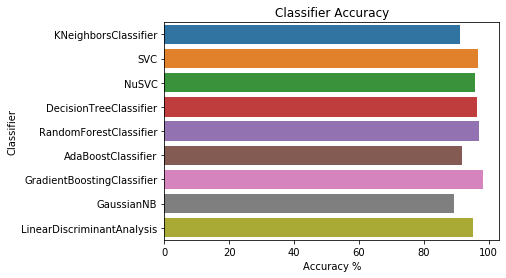

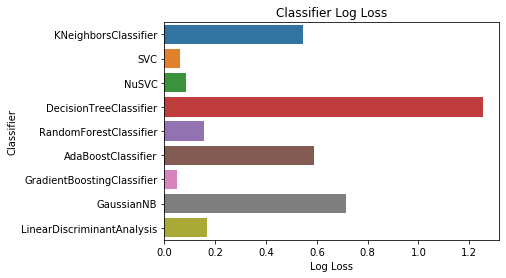

In [8]:
t1 = datetime.datetime.now() #⌚

# This is not my code found it a while back in a blog post, not sure who the credit goes to. did only minor adjustments.

classifiers = [
   KNeighborsClassifier(n_neighbors=5),
   SVC(kernel="rbf", C=1, probability=True, class_weight='balanced', random_state=42),
   NuSVC(nu=0.5, kernel='rbf', probability=True, class_weight='balanced', random_state=42), #Similar to SVC but uses a parameter to control the number of support vectors.
   DecisionTreeClassifier(class_weight='balanced', random_state=42),
   RandomForestClassifier(class_weight='balanced',random_state=42),
   AdaBoostClassifier(random_state=42),
   GradientBoostingClassifier(n_estimators=100, random_state=42),
   GaussianNB(),
   LinearDiscriminantAnalysis()]

log_cols=["Classifier", "Accuracy", "Log Loss"]

log = pd.DataFrame(columns=log_cols)
for clf in classifiers:
    clf.fit(X_pca_train, y_pca_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(X_pca_val)
    acc = accuracy_score(y_pca_val, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = clf.predict_proba(X_pca_val)
    ll = log_loss(y_pca_val, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    print("="*30)#sns.set_color_codes("muted")

t2 = datetime.datetime.now() - t1
print('⌚Process took:', t2)

sns.barplot(x='Accuracy', y='Classifier', data=log)
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()
sns.barplot(x='Log Loss', y='Classifier', data=log)
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

# Results Comparison

Result comparison:

In almost all of the cases, the PCA seems to do a better job of reducing the logloss, and improving the accuracy score by a few percent. 
- Decision Tree goes from 93% to 96%  
- Ada Boost gets 6% increase  
- GBC goes from 96% to 98% with the lowest logloss among all models  
- GaussianNB gets a 8% increase in accuracy and great reduction in logloss 




Since PCA leads to less interpretation on feature importance, I decided to use the normal standardized values over the PCA ones.

Performance of the PCA version is also much better. Since the runtime wet from 90 seconds to 43 seconds. Which is nearly twice the speed.

Among the models [there is no single bullet](https://machinelearningmastery.com/start-with-gradient-boosting/). **GBC** seems to be performing really well with the lowest logloss value. So further work is done on classifying the model with GBC and a gridsearch optimization. 

# GBC Base Model

In [9]:
# 🍻 cheers to yellowbricks
from yellowbrick.classifier import classification_report, confusion_matrix

In [10]:
gbc_base = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                      criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                      min_impurity_split=None, init=None, random_state=42, max_features=None,
                                      verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto',
                                      validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
# almost all arguements are default values, I'm just making sure they're mentioned for feature optimizations.

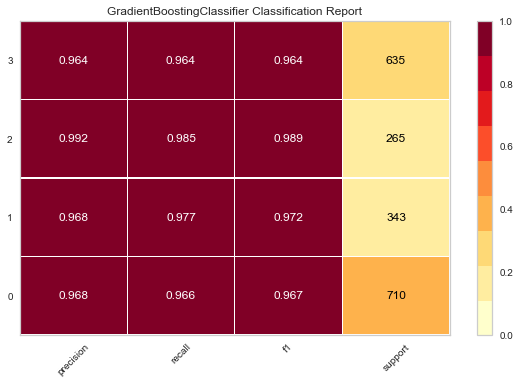

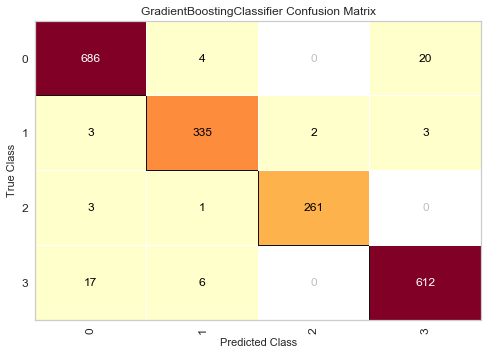

In [11]:
classification_report(gbc_base, X_train, y_train, X_val, y_val, support=True);
confusion_matrix(gbc_base, X_train, y_train, X_val, y_val);

The classification report in all values looks very promising. As seen by the scores, class 2 has the perfect score among all classes, class 3 has the lowest one. Yet all values are really good and in the range of 96-99%.

## Interpretation of the Confusion Matrix  

According to the confusion matrix of the base model:  
from cluster/class **0**:  4 values is misclassified as 1s and 20 as 3s.  
from cluster/class **1**:  3 values is misclassified as 0s, 2 as 2s, 3 as 3s.  
from cluster/class **2**:  3 values is misclassified as 0s, 1 as 2s.  
from cluster/class **3**: 17 values is misclassified as 0s, 6 as 1s.  

cluster 0 and 3 have the highest number of mislabeled predictions, this can also be expected since they had higher number of records: each close to 33% in the initial dataset.



# Model Optimization through Hyper parameter tuning

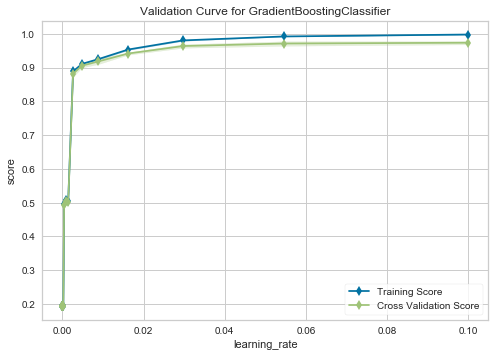

In [12]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(5)
param_range = np.logspace(-6, -1, 20)

viz = ValidationCurve(gbc_base, param_name="learning_rate", param_range=param_range,
                      cv=cv, scoring="f1_weighted", n_jobs=-1)

viz.fit(X_train, y_train)
viz.show()

## GridSearch CV

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
t1 = datetime.datetime.now()#⌚
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.06, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 2, 20),
    "min_samples_leaf": np.linspace(0.1, 1, 10),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10, 50, 100, 500]
    }

gbc_gs = GridSearchCV(GradientBoostingClassifier(), parameters, cv=cv, scoring="f1_weighted", n_jobs=-1)

gbc_gs.fit(X_train, y_train)
print('training score:', gbc_gs.score(X_train, y_train))
print('validation score:', gbc_gs.score(X_val, y_val))
t2 = t1 - datetime.datetime.now()
print('⌚ Elapsed Time:', t2)
print(gbc_gs.best_params_)